In [ ]:
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
%matplotlib inline


# Step 2: Load your dataset
df = pd.read_csv('/content/floods - India_Flood_Inventory_v3.csv.csv')  # Adjust path if needed
df.head()

# Step 3: Check relevant columns
df.columns

Index(['Unnamed: 0', 'UEI', 'Start Date', 'End Date', 'Duration(Days)',
       'Main Cause', 'Districts', 'State', 'Human fatality', 'Human injured',
       'Human Displaced', 'Animal Fatality',
       'Description of Casualties/injured', 'Extent of damage'],
      dtype='object')

In [ ]:
df['Human fatality'] = pd.to_numeric(df['Human fatality'], errors='coerce')
df['Animal Fatality'] = pd.to_numeric(df['Animal Fatality'], errors='coerce')


In [ ]:
df = df.dropna(subset=['Human fatality', 'Animal Fatality'])

In [ ]:
df['TimeIndex'] = np.arange(len(df))

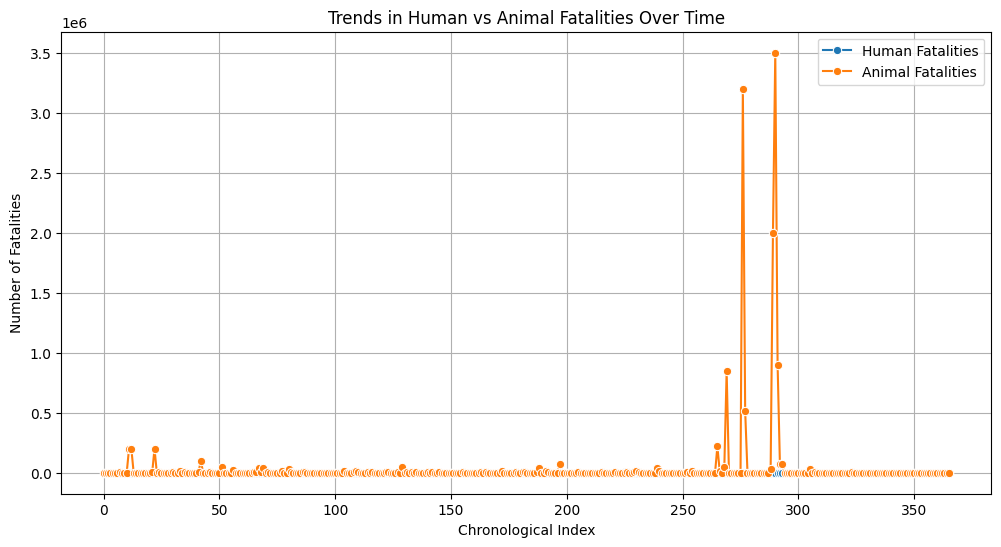

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='TimeIndex', y='Human fatality', data=df, label='Human Fatalities', marker='o')
sns.lineplot(x='TimeIndex', y='Animal Fatality', data=df, label='Animal Fatalities', marker='o')
plt.title('Trends in Human vs Animal Fatalities Over Time')
plt.xlabel('Chronological Index')
plt.ylabel('Number of Fatalities')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Ensure inline plotting works in Google Colab
%matplotlib inline
import matplotlib.pyplot as plt

def predict_future(column_name, future_points=10):
    from sklearn.linear_model import LinearRegression
    import numpy as np

    model = LinearRegression()
    X = df[['TimeIndex']]
    y = df[column_name]
    model.fit(X, y)

    # Predict future values
    future_indices = np.arange(df['TimeIndex'].max() + 1, df['TimeIndex'].max() + 1 + future_points).reshape(-1, 1)
    predictions = model.predict(future_indices)

    # Combine actual + future for plotting
    plt.figure(figsize=(10, 5))
    plt.plot(df['TimeIndex'], y, label='Actual', marker='o')
    plt.plot(future_indices.flatten(), predictions, label='Predicted', linestyle='--', color='red', marker='x')
    plt.title(f'Forecast for {column_name}')
    plt.xlabel('Chronological Index')
    plt.ylabel(column_name)
    plt.legend()
    plt.grid(True)
    plt.show()



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


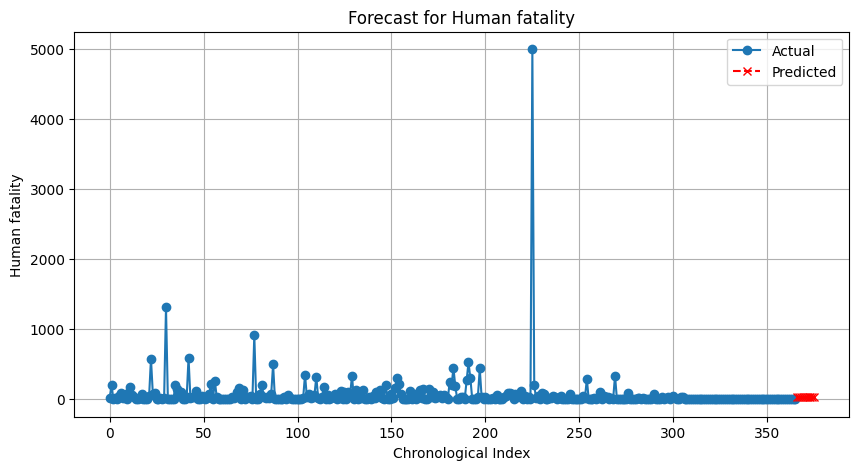

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


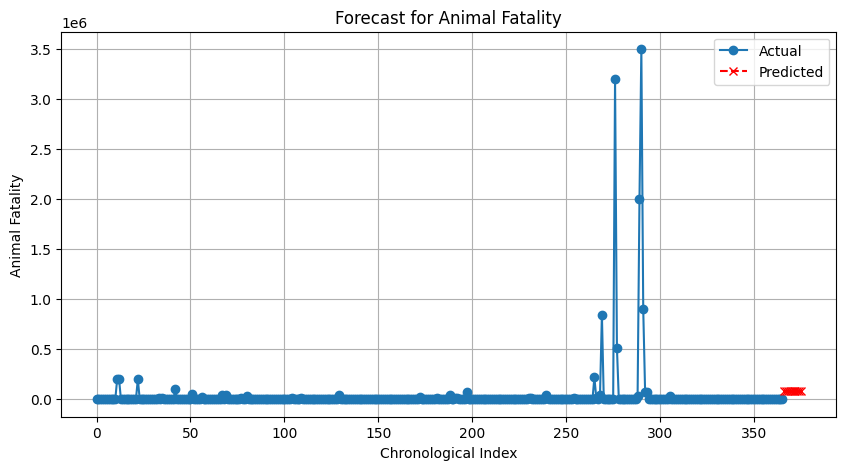

In [ ]:
predict_future('Human fatality')
predict_future('Animal Fatality')


In [ ]:
df['Start Date'] = df['Start Date'].str.strip()
df['End Date'] = df['End Date'].str.strip()

# Parse dates with day first
df['Start Date'] = pd.to_datetime(df['Start Date'], dayfirst=True)
df['End Date'] = pd.to_datetime(df['End Date'], dayfirst=True)

# Extract year and month features
df['Start_Year'] = df['Start Date'].dt.year
df['Start_Month'] = df['Start Date'].dt.month

In [ ]:
df.fillna({'Human injured': df['Human injured'].median(),})
df.dropna(subset=['Human fatality', 'Animal Fatality'], inplace=True)

In [ ]:
features = ['Duration(Days)', 'Main Cause', 'Districts', 'State',
            'Human injured', 'Human Displaced', 'Start_Year', 'Start_Month']
target = ['Human fatality', 'Animal Fatality']

X = df[features]
y = df[target]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Categorical encoding
categorical_cols = ['Main Cause', 'Districts', 'State']
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# Model
model = RandomForestRegressor(n_estimators=200, random_state=42)


In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', model)
])

In [ ]:
features = ['Duration(Days)', 'Main Cause', 'Districts', 'State', 'Human injured', 'Human Displaced', 'Start_Year', 'Start_Month']


In [ ]:
X = df[features]

In [ ]:

# Targets: Human fatality and Animal Fatality
y_human = df['Human fatality']
y_animal = df['Animal Fatality']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
categorical_cols = ['Main Cause', 'Districts', 'State']
numeric_cols = ['Duration(Days)', 'Human injured', 'Human Displaced', 'Start_Year', 'Start_Month']

# Step 5: Preprocessing pipeline
numeric_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

In [ ]:
def build_pipeline():
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=200, random_state=42))
    ])

In [ ]:
print(df['Human fatality'].describe())
print(df['Human fatality'].value_counts())


count     366.000000
mean       65.636612
std       284.701221
min         1.000000
25%         2.000000
50%        11.000000
75%        46.750000
max      5000.000000
Name: Human fatality, dtype: float64
Human fatality
1.0      61
2.0      35
3.0      19
5.0      19
4.0      13
         ..
49.0      1
288.0     1
110.0     1
46.0      1
339.0     1
Name: count, Length: 115, dtype: int64


In [ ]:
print(df['Human fatality'].describe())
print(df['Human fatality'].value_counts())
print(df['Human fatality'].isna().sum())


count     366.000000
mean       65.636612
std       284.701221
min         1.000000
25%         2.000000
50%        11.000000
75%        46.750000
max      5000.000000
Name: Human fatality, dtype: float64
Human fatality
1.0      61
2.0      35
3.0      19
5.0      19
4.0      13
         ..
49.0      1
288.0     1
110.0     1
46.0      1
339.0     1
Name: count, Length: 115, dtype: int64
0


In [ ]:
import numpy as np

y_log = np.log1p(df['Human fatality'])  # log(1 + x)


In [ ]:
print(X.isnull().sum())


Duration(Days)       1
Main Cause           2
Districts            1
State                0
Human injured      319
Human Displaced    360
Start_Year           1
Start_Month          1
dtype: int64


In [ ]:
df_model = df.drop(columns=['Human injured', 'Human Displaced', 'Unnamed: 0', 'UEI', 'End Date', 'Description of Casualties/injured'])

In [ ]:
numerical_cols = ['Duration(Days)', 'Start_Year', 'Start_Month']
categorical_cols = ['Main Cause', 'Districts', 'State']

X = df_model[numerical_cols + categorical_cols]

# Targets
y_human = np.log1p(df_model['Human fatality'])  # log transform
y_animal = np.log1p(df_model['Animal Fatality'])

In [ ]:
# Preprocessing pipeline
numeric_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Model pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

In [ ]:
import numpy as np

y = np.log1p(df['Human fatality'])


In [ ]:
cap = df['Human fatality'].quantile(0.99)
df = df[df['Human fatality'] <= cap]


In [ ]:
df = df.dropna(subset=['Start_Year', 'Start_Month'])

# 2. Select features and target
features = ['Duration(Days)', 'Main Cause', 'Districts', 'State', 'Start_Year', 'Start_Month']

# Cap extreme outliers in targets at 99th percentile to reduce skew
cap_human = df['Human fatality'].quantile(0.99)
cap_animal = df['Animal Fatality'].quantile(0.99)

df = df[(df['Human fatality'] <= cap_human) & (df['Animal Fatality'] <= cap_animal)]

# Define X and y for human fatality and animal fatality
X = df[features]

# Log-transform targets to reduce skew; add 1 to avoid log(0)
y_human = np.log1p(df['Human fatality'])
y_animal = np.log1p(df['Animal Fatality'])

In [ ]:
X_train, X_test, y_train_human, y_test_human = train_test_split(X, y_human, test_size=0.2, random_state=42)
_, _, y_train_animal, y_test_animal = train_test_split(X, y_animal, test_size=0.2, random_state=42)  # same split

# 4. Preprocessing pipeline for features

categorical_cols = ['Main Cause', 'Districts', 'State']
numerical_cols = ['Duration(Days)', 'Start_Year', 'Start_Month']

# Preprocessing for numerical data: impute missing values with median
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data: impute missing values with 'missing' and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

In [ ]:
# Preprocessing for categorical data: impute missing values and one-hot encode with dense output
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # <-- add sparse=False here
])


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)

# Full pipeline with regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])


In [ ]:
# After transformation, convert sparse to dense manually:
X_train_transformed = preprocessor.fit_transform(X_train)
if hasattr(X_train_transformed, "toarray"):
    X_train_transformed = X_train_transformed.toarray()
pipeline.named_steps['regressor'].fit(X_train_transformed, y_train_human)


RandomForestRegressor(random_state=42)

In [ ]:
pipeline.fit(X_train, y_train_human)
y_pred_human_log = pipeline.predict(X_test)
y_pred_human = np.expm1(y_pred_human_log)  # invert log1p
y_test_human_actual = np.expm1(y_test_human)

mse_human = mean_squared_error(y_test_human_actual, y_pred_human)
r2_human = r2_score(y_test_human_actual, y_pred_human)

print(f"Human Fatality Prediction - MSE: {mse_human:.2f}, R2: {r2_human:.2f}")


Human Fatality Prediction - MSE: 2717.71, R2: 0.28


In [ ]:
print(df['Animal Fatality'].describe())
print(df['Animal Fatality'].value_counts().head(10))


count       353.000000
mean       8397.062323
std       56421.807257
min           1.000000
25%           8.000000
50%          90.000000
75%         719.000000
max      847209.000000
Name: Animal Fatality, dtype: float64
Animal Fatality
1.0      24
2.0      19
4.0      13
6.0      11
3.0      10
12.0      7
50.0      6
14.0      6
200.0     6
7.0       6
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor


In [ ]:
# Remove top 1% outliers in the target
threshold = y_animal.quantile(0.99)
mask = y_animal <= threshold

X_filtered = X[mask]
y_animal_filtered = y_animal[mask]
y_animal_log_filtered = np.log1p(y_animal_filtered)


In [ ]:
# Train-test split again on filtered data
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_animal_log_filtered, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred_log = pipeline.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

mse = mean_squared_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)

print(f"✅ Animal Fatality Prediction (Filtered) - MSE: {mse:.2f}, R²: {r2:.2f}")


✅ Animal Fatality Prediction (Filtered) - MSE: 50805107.11, R²: 0.61
